In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/pyt

In [2]:
if not os.path.exists("./gen_pics"):
    os.makedirs(directory)

In [3]:
img_size_cifar = 32
num_channels_cifar = 3 
img_size_flat_cifar = img_size_cifar * img_size_cifar*num_channels_cifar
img_shape_cifar = (img_size_cifar, img_size_cifar, num_channels_cifar)
num_classes_cifar = 10

In [4]:
def show_the_plots(pic_list):
    len_1 = len(pic_list)
    width_1 = int(np.ceil(np.sqrt(len_1)))
    fig, axes = plt.subplots(width_1, width_1)
    # fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(len_1):
        axes.flat[i].imshow((pic_list[i]+1)/2)
        axes.flat[i].set_xticks([])
        axes.flat[i].set_yticks([]) 
    plt.savefig("DCGAN_example.png")
    plt.show()


In [5]:
def show_the_plots_10(pic_list):
    len_1 = len(pic_list)
    # width_1 = int(np.ceil(np.sqrt(len_1)))
    fig, axes = plt.subplots(2, 5)
    # fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(len_1):
        axes.flat[i].imshow((pic_list[i]+1)/2)
        axes.flat[i].set_xticks([])
        axes.flat[i].set_yticks([]) 
    plt.savefig("DCGAN_example.png")
    plt.show()

In [6]:
def save_image(data, filename):
    sizes = np.shape(data)     
    fig = plt.figure()
    fig.set_size_inches(1. * sizes[0] / sizes[1], 1, forward = False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(data)
    plt.savefig(filename, dpi = sizes[0]) 
    plt.close()

In [7]:
def save_pics(pic_list):
    i = 0
    for pic in pic_list:
        i += 1
        image_data = (pic+1)/2
        save_image(image_data, "gen_pics/DCGAN_pic_{}.jpg".format(i))
        
    

In [8]:
kernel_init = tf.truncated_normal_initializer(mean=0.0, stddev=0.02)


def discriminator(input_images, reuse=False, is_training=False, alpha=0.1):
    
    with tf.variable_scope('discriminator', reuse= reuse):
        

        
        layer1 = tf.layers.conv2d(input_images, filters=64, 
                                  kernel_size=3, strides=2, 
                                  padding='same', kernel_initializer=kernel_init, name='conv1')

        layer1 = tf.nn.leaky_relu(layer1, alpha=0.2, name='leaky_relu1')
    
        
        layer2 = tf.layers.conv2d(layer1, 
                                  filters=128, 
                                  kernel_size=3, 
                                  strides=2, 
                                  padding='same', 
                                  kernel_initializer=kernel_init, 
                                  name='conv2')
        
        # layer2 = tf.layers.batch_normalization(layer2,momentum=0.99, training=is_training, name='batch_normalization2')
        
        layer2 = tf.nn.leaky_relu(layer2, alpha=0.2, name='leaky_relu2')

        layer3 = tf.layers.conv2d(layer2, 
                                  filters=128, 
                                  kernel_size=3, 
                                  strides=2, 
                                  padding='same', 
                                  kernel_initializer=kernel_init, 
                                  name='conv3')
        
        # layer2 = tf.layers.batch_normalization(layer2,momentum=0.99, training=is_training, name='batch_normalization2')
        
        layer3 = tf.nn.leaky_relu(layer3, alpha=0.2, name='leaky_relu3')
 


        layer4 = tf.layers.conv2d(layer3, 
                                 filters=256, 
                                 kernel_size=3, 
                                 strides=2,
                                 padding='same',
                                 name='conv4')
        # layer3 = tf.layers.batch_normalization(layer3,momentum=0.99, training=is_training, name='batch_normalization3')
        layer4 = tf.nn.leaky_relu(layer4, alpha=0.2, name='leaky_relu4')
        
        
        layer4 = tf.layers.flatten(layer4)
        # layer4 = tf.reshape(layer4, (-1, layer4.shape[1]*layer4.shape[2]*layer4.shape[3]))
        layer4 = tf.nn.dropout(layer4, keep_prob=0.4)
        
        logits= tf.layers.dense(layer4, 1)
        
        output = tf.sigmoid(logits)
        
        return logits
    
    
# define generator 

def generator(z, z_dim, batch_size, is_training=False, reuse=False):
    
    with tf.variable_scope('generator', reuse=reuse):
        

        input_to_conv = tf.layers.dense(z, 4*4*512)
        

        layer1 = tf.reshape(input_to_conv, (-1, 4, 4, 512))
        # layer1 = tf.layers.batch_normalization(layer1, momentum=0.99, training=is_training, name='batch_normalization1')
        layer1 = tf.nn.leaky_relu(layer1, alpha=0.2, name='leaky_relu1_g')
        
        
        layer2 = tf.layers.conv2d_transpose(layer1, filters=256, kernel_size=5, strides= 2, padding='same', 
                                            kernel_initializer=kernel_init, name='deconvolution2')
        # layer2 = tf.layers.batch_normalization(layer2, momentum=0.99, training=is_training, name='batch_normalization2')
        layer2 = tf.nn.leaky_relu(layer2, alpha=0.2, name='leaky_relu2_g')
        # layer2 = tf.nn.relu(layer2, name='relu2')
        
 
        layer3 = tf.layers.conv2d_transpose(layer2, filters=128, kernel_size=5, strides= 2, padding='same', 
                                            kernel_initializer=kernel_init, name='deconvolution3')
        # layer3 = tf.layers.batch_normalization(layer3, momentum=0.99, training=is_training, name='batch_normalization3')
        
        layer3 = tf.nn.leaky_relu(layer3, alpha=0.2, name='leaky_relu3_g')
        

        layer4 = tf.layers.conv2d_transpose(layer3, filters=256, kernel_size=5, strides= 2, padding='same', 
                                            kernel_initializer=kernel_init, name='deconvolution4')
        # layer4 = tf.layers.batch_normalization(layer4, momentum=0.99, training=is_training, name='batch_normalization4')
        layer4 = tf.nn.leaky_relu(layer4, alpha=0.2, name='leaky_relu4_g')
        
        

        layer5 = tf.layers.conv2d_transpose(layer4, filters=3, kernel_size=5, strides=1, padding='same', 
                                            kernel_initializer=kernel_init, name='deconvolution5')
           
        
        logits = tf.tanh(layer5, name='tanh')
        
        return logits
    

x = tf.placeholder(tf.float32, shape= (None, img_size_cifar, img_size_cifar, num_channels_cifar), name="d_input")
is_training = tf.placeholder(tf.bool, [], name='is_training')

batch_size = 100
z_dim = 100

#z = tf.random_normal([batch_size, z_dim], mean=0.0, stddev=1.0, name='z')

z = np.random.uniform(-1,1, size=[batch_size, z_dim]).astype(np.float32)

fake_x = generator(z, z_dim, batch_size, is_training=is_training)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


In [9]:
def generate_new_samples(session, num_plots):
    
    #randomly sample noise from the normal distribution
    z = np.random.uniform(-1,1, size=[num_plots, z_dim]).astype(np.float32)

    is_training = tf.placeholder(tf.bool, [], name='training_bool')     
    #generate a fake image
    
    
    samples = session.run(generator(z, z_dim, batch_size, is_training, reuse=True),feed_dict={is_training: True})
    show_the_plots(samples)
     
    

In [10]:
def generate_new_samples_10(session, num_plots):
    
    #randomly sample noise from the normal distribution
    z = np.random.uniform(-1,1, size=[num_plots, z_dim]).astype(np.float32)

    is_training = tf.placeholder(tf.bool, [], name='training_bool')     
    #generate a fake image
    
    
    samples = session.run(generator(z, z_dim, batch_size, is_training, reuse=True),feed_dict={is_training: True})
    show_the_plots_10(samples)

In [11]:
def save_new_samples(session, num_plots):
    
    #randomly sample noise from the normal distribution
    z = np.random.uniform(-1,1, size=[num_plots, z_dim]).astype(np.float32)

    is_training = tf.placeholder(tf.bool, [], name='training_bool')     
    #generate a fake image
    
    
    samples = session.run(generator(z, z_dim, batch_size, is_training, reuse=True),feed_dict={is_training: True})
    save_pics(samples)

In [12]:
saver = tf.train.Saver()

INFO:tensorflow:Restoring parameters from ./saved_models/model_backup.ckpt


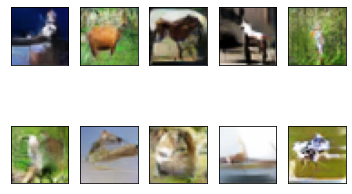

In [14]:
with tf.Session() as sess_1:
    saver.restore(sess_1, "./saved_models/model_backup.ckpt") 
    generate_new_samples_10(sess_1, 10)
    save_new_samples(sess_1, 2560)
    